# **Performing quality control (QC) on next-generation sequencing (NGS) data**
---

### 1. Introduction to NGS data

NGS data is usually received in the FASTQ format. Each FASTQ test file can contain multiple reads from each NGS run. To showcase the FASTQ format, we are downloading and viewing the NGS data for one individual from the 1000 Genomes Project (1KGP).

In [2]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR055/ERR055765/ERR055765_1.fastq.gz

--2023-12-28 05:16:37--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR055/ERR055765/ERR055765_1.fastq.gz
           => ‘ERR055765_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/ERR055/ERR055765 ... done.
==> SIZE ERR055765_1.fastq.gz ... 2196023346
==> PASV ... done.    ==> RETR ERR055765_1.fastq.gz ... done.
Length: 2196023346 (2.0G) (unauthoritative)

100%[====================================>] 2,196,023,346 26.5MB/s   in 86s    

2023-12-28 05:18:05 (24.3 MB/s) - ‘ERR055765_1.fastq.gz’ saved [2196023346]



In [3]:
!mkdir ./files
!mkdir ./files/step_1_ngs_quality_control

In [4]:
!mv ERR055765_1.fastq.gz ./files/step_1_ngs_quality_control/

In [5]:
!zcat ./files/step_1_ngs_quality_control/ERR055765_1.fastq.gz | head -n10

@ERR055765.1 HS12_6764:4:1204:18972:69546#3/1
CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACACTAACACTAACCCA
+
;;<DDDDB??B??GBEHEHIC@EA>+C?;CFEBB?;?FB8DEHB;;DGGI@6C@F(6=).=2=6?@2?=;(6;;55(;;?<9C(5(((:?:+(+9((8?(
@ERR055765.2 HS12_6764:4:1205:17951:89436#3/1
CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAAC
+
CCCFFFFFHHHHHJJIJJJJIJJJJJJJJJJGIIJIJJIIIHGIEHJJJJI@GGHGGJIGH@CEFFBD7>A@?5?CAAB9ACA?A@9AB?B2<(8A(+9?
@ERR055765.3 HS12_6764:4:1208:2207:79776#3/1
CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCCTCC

gzip: stdout: Broken pipe


The FASTQ format includes:
- read identifier line that starts with "@"
- base call sequence
- a spacer line (sometimes with the same identifer as the read identifier line)
- quality score for each base called in the base call sequence

and it repeats for each read of which there are many in each FASTQ file.

---
### 2. FastQC for assessing the quality of the reads in a FASTQ file

FastQC is a software used before running QC to provide some checks especially through graphs and plots for a quick overview. This step tells us what to pay attention to when running the QC. We first go through how to install fastQC.

In [1]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip

--2023-12-29 02:53:55--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11709692 (11M) [application/zip]
Saving to: ‘fastqc_v0.12.1.zip’

100%[======================================>] 11,709,692  10.4MB/s   in 1.1s   

2023-12-29 02:54:02 (10.4 MB/s) - ‘fastqc_v0.12.1.zip’ saved [11709692/11709692]



In [3]:
!mv fastqc_v0.12.1.zip ./files/step_1_ngs_quality_control/fastQC_software
!unzip ./files/step_1_ngs_quality_control/fastQC_software/fastqc_v0.12.1.zip
!chmod +x FastQC/fastqc

In [4]:
!./files/step_1_ngs_quality_control/fastQC_software/FastQC/fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

At this point, some would add the directoy to the script to $PATH permanently by editing .bashrc. However, for this demonstration, we are using the script straight from the directory. Following the instructions from FastQC (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/INSTALL.txt), we formulate our commands as follow:

In [5]:
!mkdir ./files/step_1_ngs_quality_control/pre_QC
!./files/step_1_ngs_quality_control/fastQC_software/FastQC/fastqc ./files/step_1_ngs_quality_control/ERR055765_1.fastq.gz --extract --delete --outdir ./files/step_1_ngs_quality_control/pre_QC

application/gzip
Started analysis of ERR055765_1.fastq.gz
Approx 5% complete for ERR055765_1.fastq.gz
Approx 10% complete for ERR055765_1.fastq.gz
Approx 15% complete for ERR055765_1.fastq.gz
Approx 20% complete for ERR055765_1.fastq.gz
Approx 25% complete for ERR055765_1.fastq.gz
Approx 30% complete for ERR055765_1.fastq.gz
Approx 35% complete for ERR055765_1.fastq.gz
Approx 40% complete for ERR055765_1.fastq.gz
Approx 45% complete for ERR055765_1.fastq.gz
Approx 50% complete for ERR055765_1.fastq.gz
Approx 55% complete for ERR055765_1.fastq.gz
Approx 60% complete for ERR055765_1.fastq.gz
Approx 65% complete for ERR055765_1.fastq.gz
Approx 70% complete for ERR055765_1.fastq.gz
Approx 75% complete for ERR055765_1.fastq.gz
Approx 80% complete for ERR055765_1.fastq.gz
Approx 85% complete for ERR055765_1.fastq.gz
Approx 90% complete for ERR055765_1.fastq.gz
Approx 95% complete for ERR055765_1.fastq.gz
Analysis complete for ERR055765_1.fastq.gz


Here, we display a few graphs that are generally important to keep in mind.

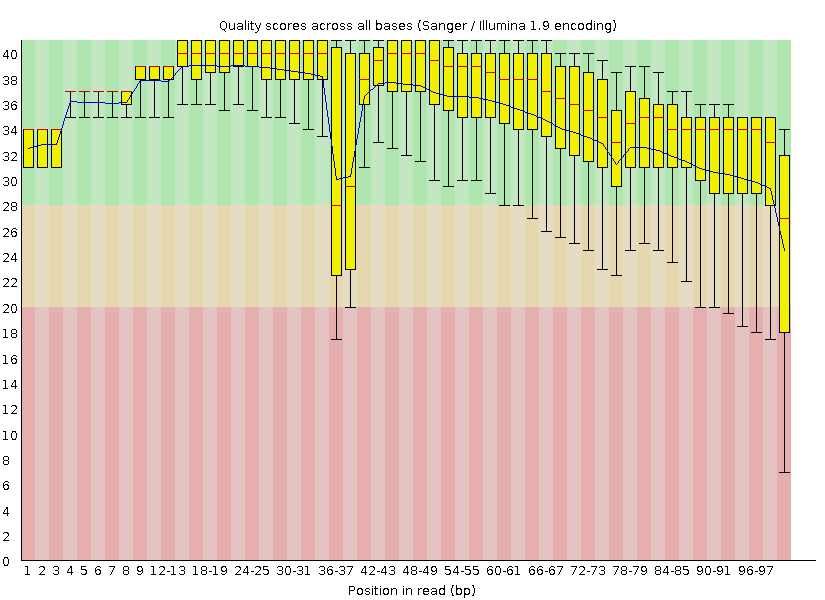

*Per base sequence quality: shows the Phred quality score (Q score) of the sequence reads - the higher score the better. We observe the characteristic decay in quality that is common is most NGS runs. The score here shows that this NGS run is good with most base call's Phred score above the acceptable range (orange and green).*

---

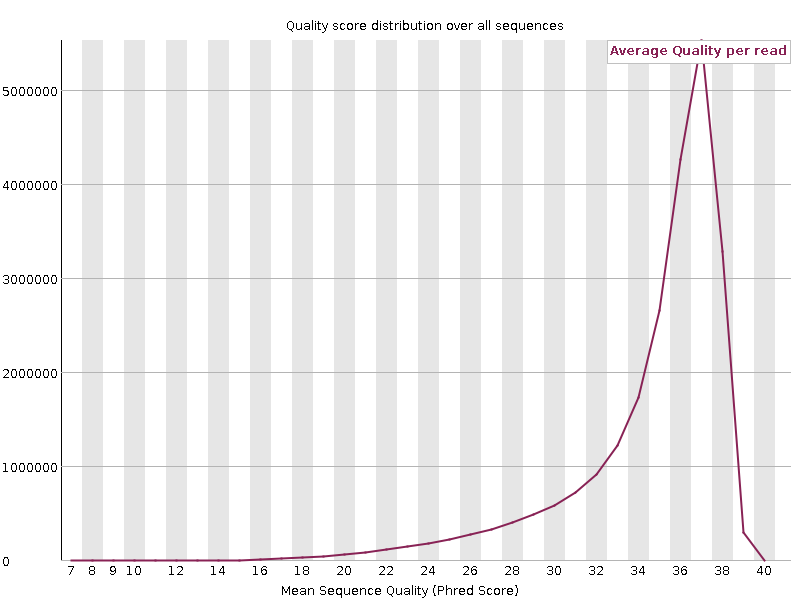

*Per sequence quality score: shows the average Phred quality score distribution for all reads. It is better for the plotted line to peak on the right side standing for the higher Phred score. This run shows a high average Phred score.*

---

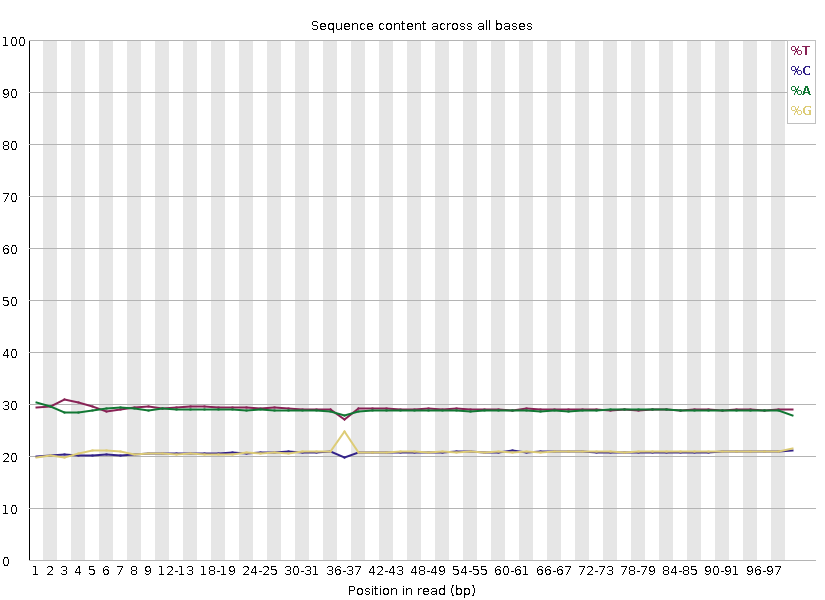

*Per base sequence content: displays the proportion of each base at each position for all reads. In a random library from a normal genome, all bases should be represented roughly equally which translate to four (4) parallel lines in this plot. Deviation from this pattern can mean untrimmed adapters or other problems with library preparation. We observe the four parallel lines in this NGS run, which means the data is probably already QC'ed.*

---

For the purpose of demonstrating how to do QC, we will look for another dataset that has not been QC'ed.

In [1]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR075/SRR075914/SRR075914_2.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR075/SRR075914/SRR075914_1.fastq.gz

--2024-01-04 03:59:43--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR075/SRR075914/SRR075914_2.fastq.gz
           => ‘SRR075914_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR075/SRR075914 ... done.
==> SIZE SRR075914_2.fastq.gz ... 50554837
==> PASV ... done.    ==> RETR SRR075914_2.fastq.gz ... done.
Length: 50554837 (48M) (unauthoritative)

100%[======================================>] 50,554,837  13.8MB/s   in 7.4s   

2024-01-04 03:59:52 (6.51 MB/s) - ‘SRR075914_2.fastq.gz’ saved [50554837]

--2024-01-04 03:59:52--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR075/SRR075914/SRR075914_1.fastq.gz
           => ‘SRR075914_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62

In [2]:
!mv SRR075914_1.fastq.gz ./files/step_1_ngs_quality_control/
!mv SRR075914_2.fastq.gz ./files/step_1_ngs_quality_control/

This time, we are downloading two fastq files instead of one. These two files came about because this NGS run is a paried-end run. The previous sample was also paried-end, but only one of the two files was displayed. We perform the same pre-QC steps with the FastQ software.

In [3]:
!./files/step_1_ngs_quality_control/fastQC_software/FastQC/fastqc ./files/step_1_ngs_quality_control/SRR075914_1.fastq.gz --extract --delete --outdir ./files/step_1_ngs_quality_control/pre_QC
!./files/step_1_ngs_quality_control/fastQC_software/FastQC/fastqc ./files/step_1_ngs_quality_control/SRR075914_2.fastq.gz --extract --delete --outdir ./files/step_1_ngs_quality_control/pre_QC

application/gzip
Started analysis of SRR075914_1.fastq.gz
Approx 5% complete for SRR075914_1.fastq.gz
Approx 10% complete for SRR075914_1.fastq.gz
Approx 15% complete for SRR075914_1.fastq.gz
Approx 20% complete for SRR075914_1.fastq.gz
Approx 25% complete for SRR075914_1.fastq.gz
Approx 30% complete for SRR075914_1.fastq.gz
Approx 35% complete for SRR075914_1.fastq.gz
Approx 40% complete for SRR075914_1.fastq.gz
Approx 45% complete for SRR075914_1.fastq.gz
Approx 50% complete for SRR075914_1.fastq.gz
Approx 55% complete for SRR075914_1.fastq.gz
Approx 60% complete for SRR075914_1.fastq.gz
Approx 65% complete for SRR075914_1.fastq.gz
Approx 70% complete for SRR075914_1.fastq.gz
Approx 75% complete for SRR075914_1.fastq.gz
Approx 80% complete for SRR075914_1.fastq.gz
Approx 85% complete for SRR075914_1.fastq.gz
Approx 90% complete for SRR075914_1.fastq.gz
Approx 95% complete for SRR075914_1.fastq.gz
Analysis complete for SRR075914_1.fastq.gz
application/gzip
Started analysis of SRR07591

The same types of plots are displayed below for these two fastq files:

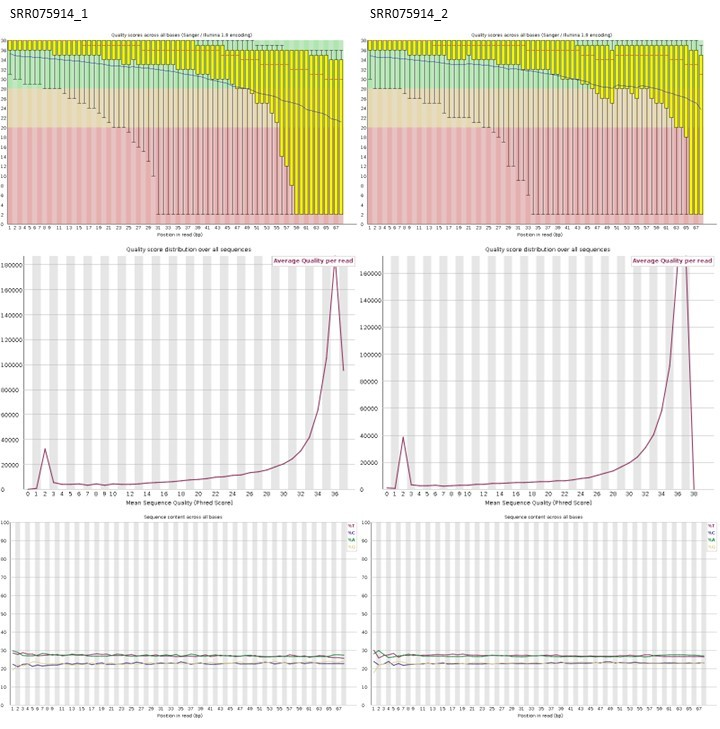

In the top plots, we observe the characteristic decay. In this run, the decay is more prominent and should be considered in QC. The middle plots show good good Phred score in general except for a few base calls. This might be improved by trimming the decay from the reads as observed in the top plots. In the bottom plots, we see some deviation from the expected parallel lines in the first few bases. This is highly likely the adapters from library preparation for the NGS runs. This is another point for QC.

Now that we have identified two points of interest for QC, we move on to downloading and running the QC software.

---
#### Revsion 1:
Upon further research, another important tab in the FastQC report is the **Overrepresented sequences** tab. This tab identifies sequences that should pose a problem for downstream analysis such as adapters and primers. Therefore, this tab should indicate another point of interest for QC.

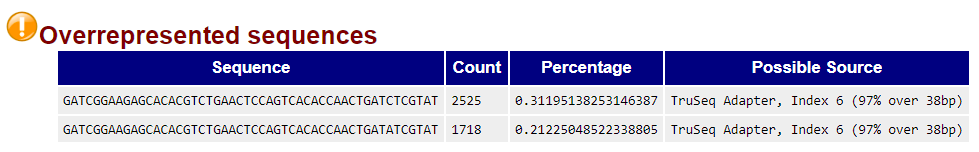

---
### 3. fastp for quality control of FastQ files

fastp is a software used to quality control FastQ files (both single-end and paried-end). The software is a command line program and takes care of most filter automatically: including adapters, base quality filtering - which are what we need from the previous analysis.

Here, we install this software in the current conda environment in the command line instead of in the jupyter notebook - a bit different from the installing method for FastQ.

In [1]:
!fastp -i ./files/step_1_ngs_quality_control/SRR075914_1.fastq.gz -I ./files/step_1_ngs_quality_control/SRR075914_2.fastq.gz -o QC_SRR075914_1.fastq.gz -O QC_SRR075914_2.fastq.gz

Read1 before filtering:
total reads: 809421
total bases: 55040628
Q20 bases: 46377472(84.2604%)
Q30 bases: 42759855(77.6878%)

Read2 before filtering:
total reads: 809421
total bases: 55040628
Q20 bases: 47448925(86.2071%)
Q30 bases: 43159361(78.4136%)

Read1 after filtering:
total reads: 645800
total bases: 43871454
Q20 bases: 41755795(95.1776%)
Q30 bases: 39101559(89.1276%)

Read2 after filtering:
total reads: 645800
total bases: 43871454
Q20 bases: 42405746(96.6591%)
Q30 bases: 39389107(89.783%)

Filtering result:
reads passed filter: 1291600
reads failed due to low quality: 325768
reads failed due to too many N: 1474
reads failed due to too short: 0
reads with adapter trimmed: 7326
bases trimmed due to adapters: 97562

Duplication rate: 0.280324%

Insert size peak (evaluated by paired-end reads): 105

JSON report: fastp.json
HTML report: fastp.html

fastp -i ./files/step_1_ngs_quality_control/SRR075914_1.fastq.gz -I ./files/step_1_ngs_quality_control/SRR075914_2.fastq.gz -o QC_SRR0

In [2]:
!mkdir ./files/step_1_ngs_quality_control/QC_by_fastp
!mv fastp.html ./files/step_1_ngs_quality_control/QC_by_fastp
!mv fastp.json ./files/step_1_ngs_quality_control/QC_by_fastp
!mv QC_SRR075914_1.fastq.gz ./files/step_1_ngs_quality_control/QC_by_fastp
!mv QC_SRR075914_2.fastq.gz ./files/step_1_ngs_quality_control/QC_by_fastp

fastp produces new FastQ files and a QC report with plots that are similar to that of FastQC along others informative ones.

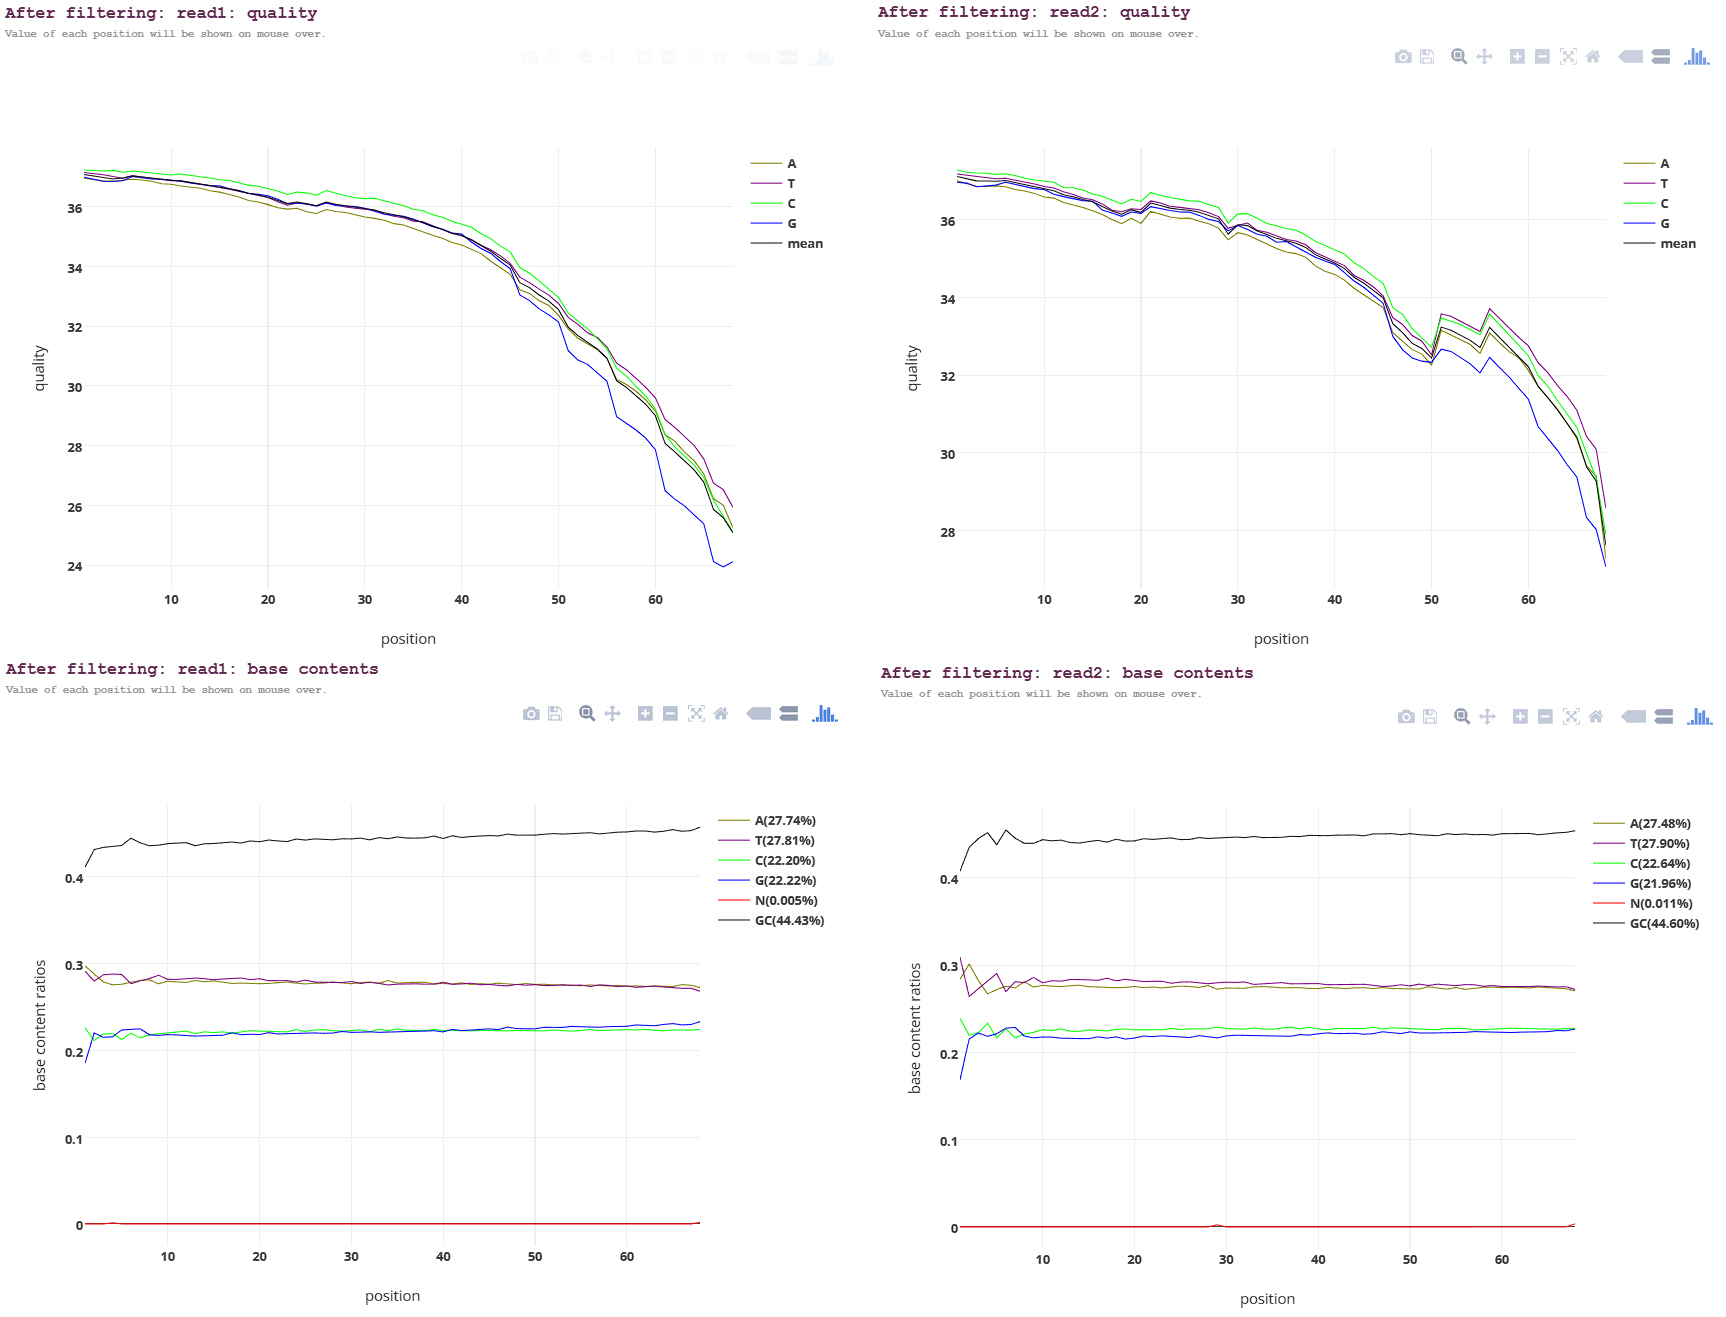

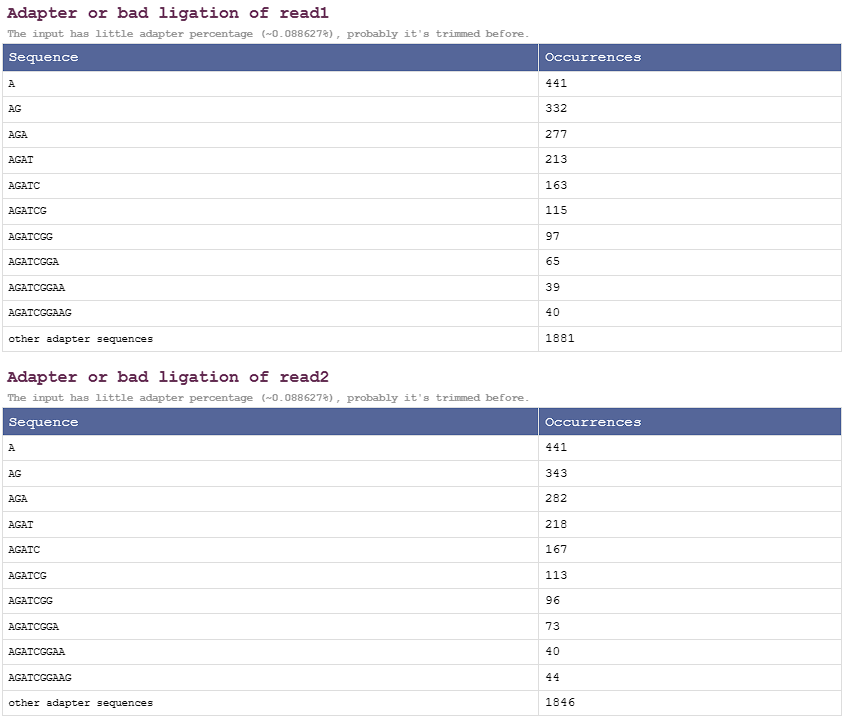

From the series of plots, we can note that the algorithm determined that adapter was likely removed already. Otherwise, the software did other filtering to produce two new FastQ files that are usuable downstream. At this point, we can rerun the new FastQ files with FastQC to receive the updated QC metric plots. However, since fastp produces the same report, it is unnecessary.

---
### 4. Multiple samples QC? MultiQC!

At this point, a natural question for me was how about when we receive a batch of multiple samples with way too many FastQ files to perform QC manually. Let's explore options to do this efficiently. 

A potential tool that can be used here in tandem with FastQC and fastp is MultiQC. MultiQC is a software that aggregates QC reports from various softwares including FastQC and fastp. 

Hypothetically, we can use a python/bash script to run fastp on all samples. Then, we can run MultiQC on the resulting reports to see if we need to reiterate another round of QC. We need to assess for each case whether running FastQC is necessary before runnign fastp because the plots produced by fastp is similar to those of FastQC.